# TASK A. Binary Task with the Aid of CNN

## Importing the libraries

The required libraries for this notebook are imported as follows:

In [1]:
import numpy as np
from sklearn import svm
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from skimage.io import imread
import seaborn as sns
import os
import matplotlib.pyplot as plt

import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, InputLayer, Dropout

Using TensorFlow backend.


##  Loading the Dataset and Extracting Features and Labels for Each Image

In [2]:
# Defining the folder paths to all images
basedir = './dataset'
images_dir = os.path.join(basedir,'image')

# Finding the specific path for each image
image_paths = [os.path.join(images_dir, l) for l in os.listdir(images_dir)]
target_size = None

# Defining the label document
labels_filename = 'label.csv'
# Opening the label document
labels_file = open(os.path.join(basedir, labels_filename), 'r')

# Reading each line of the labels file
lines = labels_file.readlines()

# Splitting the image name and the associated label
tumor_labels = {line.split(',')[0] : (line.split(',')[1]) for line in lines[1:]}

# Changing the labels to binary format by assigning 0 for no_tumor and 1 for brain with tumor
for i in tumor_labels:
    tumor_labels[i] = tumor_labels[i].replace('\n', '')
    if tumor_labels[i] == "no_tumor":
        tumor_labels[i] = 0
    else:
        tumor_labels[i] = 1
        
# Printing the final labels' format       
print(tumor_labels)    

# Function for extracting features
def extract_features_labels():
    if os.path.isdir(images_dir):
        all_features = []
        all_labels = []
        for img_path in image_paths:
            file_name = img_path.split('\\')[-1] # If using macOS, change the "\\" to "/"  

            # Loading image and setting the as_gray parameter of imread to True 
            # This way our grayscale image is read as grayscale without RGB channels 
            img = imread(img_path, as_gray = True)
            
            # Reshaping to make sure the images are read correctly 
            features = np.reshape(img, (512,512,1))
            
            # Storing the pixel information in the all_features array
            # and the label information in the all_labels array
            if features is not None:
                all_features.append(features)
                all_labels.append(tumor_labels[file_name])

    # Converting them to numpy arrays            
    np_features = np.array(all_features)
    np_labels = np.array(all_labels)
    
    return np_features, np_labels


{'IMAGE_0000.jpg': 1, 'IMAGE_0001.jpg': 0, 'IMAGE_0002.jpg': 1, 'IMAGE_0003.jpg': 1, 'IMAGE_0004.jpg': 1, 'IMAGE_0005.jpg': 1, 'IMAGE_0006.jpg': 0, 'IMAGE_0007.jpg': 1, 'IMAGE_0008.jpg': 1, 'IMAGE_0009.jpg': 1, 'IMAGE_0010.jpg': 1, 'IMAGE_0011.jpg': 1, 'IMAGE_0012.jpg': 1, 'IMAGE_0013.jpg': 1, 'IMAGE_0014.jpg': 1, 'IMAGE_0015.jpg': 1, 'IMAGE_0016.jpg': 1, 'IMAGE_0017.jpg': 1, 'IMAGE_0018.jpg': 1, 'IMAGE_0019.jpg': 0, 'IMAGE_0020.jpg': 0, 'IMAGE_0021.jpg': 1, 'IMAGE_0022.jpg': 1, 'IMAGE_0023.jpg': 1, 'IMAGE_0024.jpg': 1, 'IMAGE_0025.jpg': 1, 'IMAGE_0026.jpg': 1, 'IMAGE_0027.jpg': 0, 'IMAGE_0028.jpg': 1, 'IMAGE_0029.jpg': 1, 'IMAGE_0030.jpg': 1, 'IMAGE_0031.jpg': 1, 'IMAGE_0032.jpg': 1, 'IMAGE_0033.jpg': 1, 'IMAGE_0034.jpg': 1, 'IMAGE_0035.jpg': 1, 'IMAGE_0036.jpg': 0, 'IMAGE_0037.jpg': 1, 'IMAGE_0038.jpg': 1, 'IMAGE_0039.jpg': 1, 'IMAGE_0040.jpg': 1, 'IMAGE_0041.jpg': 1, 'IMAGE_0042.jpg': 0, 'IMAGE_0043.jpg': 1, 'IMAGE_0044.jpg': 1, 'IMAGE_0045.jpg': 1, 'IMAGE_0046.jpg': 1, 'IMAGE_0047.

In [3]:
# Calling the function extract_features_labels 
# Storing the image information on X and label information on y
X, y = extract_features_labels()

In [4]:
# Checking the shape of the image information array
X.shape

(3000, 512, 512, 1)

## Preparing the Training and Validation Set

In [5]:
# Splitting the label and features datasets into 80% training and 20% validation set
x_train, x_val, y_train, y_val = train_test_split(X, y, train_size=0.8, random_state=10)

## Building the CNN Model 

In [6]:
CNN_model = Sequential()
CNN_model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(512, 512, 1)))
CNN_model.add(MaxPooling2D((2, 2)))
CNN_model.add(Dropout(0.2))

CNN_model.add(Conv2D(64, (3, 3), activation='relu'))
CNN_model.add(MaxPooling2D((2, 2)))
CNN_model.add(Dropout(0.2))

CNN_model.add(Conv2D(32, (3, 3), activation='relu'))
CNN_model.add(MaxPooling2D((2, 2)))
CNN_model.add(Dropout(0.2))

CNN_model.add(Conv2D(16, (3, 3), activation='relu'))
CNN_model.add(MaxPooling2D((2, 2)))
CNN_model.add(Dropout(0.2))

CNN_model.add(Flatten())
CNN_model.add(Dense(128, activation='relu'))
CNN_model.add(Dropout(0.5))
CNN_model.add(Dense(1, activation='sigmoid'))

## Compiling the CNN Model

In [7]:
# To compile the model, the loss function is specified as binary cross entropy as this is a binary classification task
# the optimizer is set as Adam and accuracy is added to metrics for monitoring the accuracy during training. 
CNN_model.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer='adam')
CNN_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 510, 510, 32)      320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 255, 255, 32)      0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 255, 255, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 253, 253, 64)      18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 126, 126, 64)      0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 126, 126, 64)      0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 124, 124, 32)     

## Fitting the CNN Model

In [8]:
# Training the CNN model for 10 epochs and evaluating the model with validation set
history = CNN_model.fit(x_train, y_train, batch_size=10, epochs=10, validation_data=(x_val, y_val))

Train on 2400 samples, validate on 600 samples
Epoch 1/10
2400/2400 [==============================] - 23s 10ms/step - loss: 0.4369 - accuracy: 0.8462 - val_loss: 0.3708 - val_accuracy: 0.8550: 10s - lo - ETA: 8s - loss: 0.4535 - accu - ETA: 7s - loss: 0.4474 - accuracy - ETA: 7s - loss: 0.4485 - accuracy - ETA: 7s - loss: 0.4489 - accu - ETA: 6s - loss: 0.4464 - accuracy: 0. - ETA - ETA: 0s - loss: 0.4388 - accuracy: 0.
Epoch 2/10
2400/2400 [==============================] - 19s 8ms/step - loss: 0.3264 - accuracy: 0.8604 - val_loss: 0.2894 - val_accuracy: 0.8583- loss: 0.3309 - accuracy: 0. - ETA: 3s - loss: 0.3291  - ETA: 3s - loss: 0.3303 - accuracy: 0. - ETA: 2s - loss: 0.3284 - accuracy - ETA: 2s - l - ETA: 1s - loss: 0.3289 - accuracy: 0. - ETA: 1s - loss: 0.3285  - ETA: 0s - loss: 0.3
Epoch 3/10
2400/2400 [==============================] - 19s 8ms/step - loss: 0.2626 - accuracy: 0.8729 - val_loss: 0.2405 - val_accuracy: 0.8833.2654 - accuracy: 0. - ETA: 7s - loss: 0.2650 - accur

## Predicting the Outputs of the Validation Set

In [9]:
# Predicting the output of model
y_prediction = CNN_model.predict_classes(x_val)

In [10]:
y_prediction

array([[1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
    

In [11]:
y_prediction.shape

(600, 1)

## Evaluating the CNN Model Using the Validation Set

In [12]:
# Plotting accuracy and loss as a function of number of epoch
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    
    # Summarizing history for accuracy
    axs[0].plot(range(1,len(model_history.history['accuracy'])+1),model_history.history['accuracy'])
    axs[0].plot(range(1,len(model_history.history['val_accuracy'])+1),model_history.history['val_accuracy'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].legend(['Training Accuracy', 'Validation Accuracy'], loc='best')
    
    # Summarizing history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].legend(['Training Loss', 'Validation Loss'], loc='best')
    plt.show()

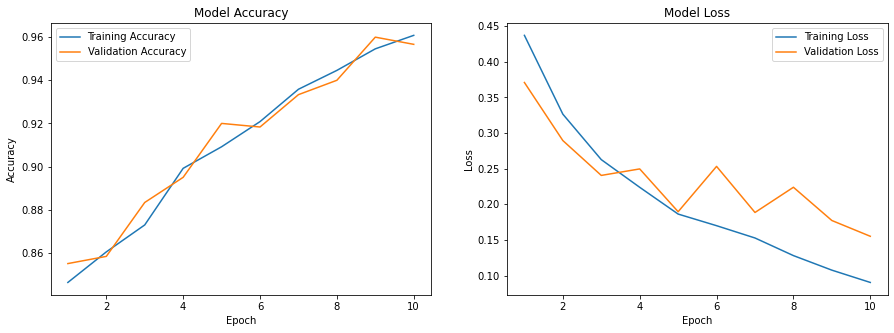

In [13]:
plot_model_history(history)

In [14]:
# Evaluating the CNN Model by determining the accuracy score
print("Accuracy on the validation set: " +str(accuracy_score(y_val, y_prediction)))

Accuracy on the validation set: 0.9566666666666667


In [15]:
# Evaluating the CNN Model by creating a classification report
target_names = ['Patient without Tumor', 'Patient with Tumor']
print("Classification report: ", classification_report(y_val, y_prediction, target_names=target_names))

Classification report:                         precision    recall  f1-score   support

Patient without Tumor       0.88      0.82      0.85        87
   Patient with Tumor       0.97      0.98      0.97       513

             accuracy                           0.96       600
            macro avg       0.92      0.90      0.91       600
         weighted avg       0.96      0.96      0.96       600



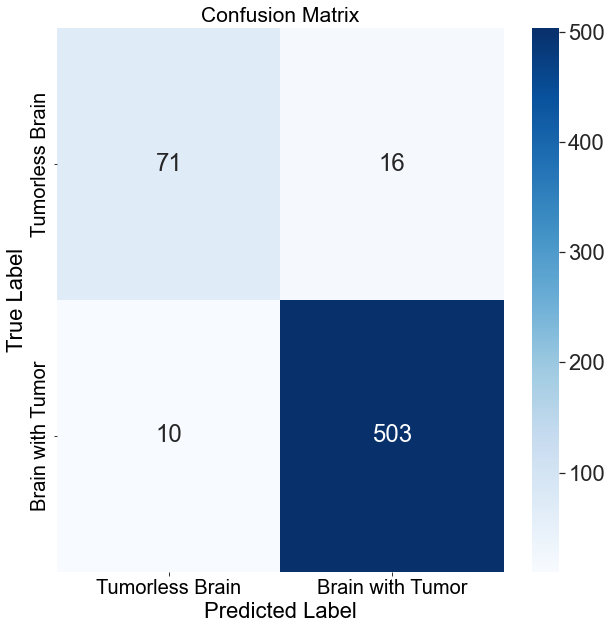

In [16]:
# Evaluating the CNN model by creating a confusion matrix
cm = confusion_matrix(y_val, y_prediction)

plt.figure(figsize=(10,10))
ax = plt.subplot()

sns.set(font_scale=2) 
sns.heatmap(cm, annot=True, ax=ax, cmap="Blues", fmt="g");  

# Labels, title and ticks
label_font = {'size':'22'} 
ax.set_xlabel('Predicted Label', fontdict=label_font);
ax.set_ylabel('True Label', fontdict=label_font);

title_font = {'size':'21'}  
ax.set_title('Confusion Matrix', fontdict=title_font);

ax.tick_params(axis='both', which='major', labelsize=20) 
ax.xaxis.set_ticklabels(['Tumorless Brain', 'Brain with Tumor']);
ax.yaxis.set_ticklabels(['Tumorless Brain', 'Brain with Tumor']);
plt.show()

## Loading the Test Data

In [17]:
# Defining the folder paths to all images in the test set
basedir2 = './test'
images_dir2 = os.path.join(basedir2,'image')

# Finding the specific path for each image
image_paths2 = [os.path.join(images_dir2, l) for l in os.listdir(images_dir2)]
target_size = None

# Defining the label document
labels_filename = 'label.csv'
# Opening the label document
labels_file2 = open(os.path.join(basedir2, labels_filename), 'r')

# Reading each line of the labels file
lines2 = labels_file2.readlines()

# Splitting the image name and the associated label
tumor_labels2 = {line.split(',')[0] : (line.split(',')[1]) for line in lines2[1:]}

# Changing the labels to binary format by assigning 0 for no_tumor and 1 for brain with tumor
for i in tumor_labels2:
    tumor_labels2[i] = tumor_labels2[i].replace('\n', '')
    if tumor_labels2[i] == "no_tumor":
        tumor_labels2[i] = 0
    else:
        tumor_labels2[i] = 1
        
# Printing the final labels' format       
print(tumor_labels2)   

# Function for extracting features
def extract_features_labels_test():
    if os.path.isdir(images_dir2):
        all_features2 = []
        all_labels2 = []
        for img_path in image_paths2:
            file_name = img_path.split('\\')[-1] # If using macOS, change the "\\" to "/"  

            # Loading image and setting the as_gray parameter of imread to True 
            # This way our grayscale image is read as grayscale without RGB channels 
            img = imread(img_path, as_gray = True)
            
            # Reshaping to make sure the images are read correctly 
            features = np.reshape(img, (512,512,1))
            
            # Storing the pixel information in the all_features array
            # and the label information in the all_labels array
            if features is not None:
                all_features2.append(features)
                all_labels2.append(tumor_labels2[file_name])

    # Converting them to numpy arrays           
    np_features2 = np.array(all_features2)
    np_labels2 = np.array(all_labels2)
    
    return np_features2, np_labels2

{'IMAGE_0000.jpg': 1, 'IMAGE_0001.jpg': 1, 'IMAGE_0002.jpg': 1, 'IMAGE_0003.jpg': 1, 'IMAGE_0004.jpg': 1, 'IMAGE_0005.jpg': 1, 'IMAGE_0006.jpg': 1, 'IMAGE_0007.jpg': 1, 'IMAGE_0008.jpg': 1, 'IMAGE_0009.jpg': 1, 'IMAGE_0010.jpg': 0, 'IMAGE_0011.jpg': 0, 'IMAGE_0012.jpg': 1, 'IMAGE_0013.jpg': 1, 'IMAGE_0014.jpg': 1, 'IMAGE_0015.jpg': 1, 'IMAGE_0016.jpg': 1, 'IMAGE_0017.jpg': 1, 'IMAGE_0018.jpg': 1, 'IMAGE_0019.jpg': 1, 'IMAGE_0020.jpg': 1, 'IMAGE_0021.jpg': 1, 'IMAGE_0022.jpg': 1, 'IMAGE_0023.jpg': 1, 'IMAGE_0024.jpg': 1, 'IMAGE_0025.jpg': 1, 'IMAGE_0026.jpg': 0, 'IMAGE_0027.jpg': 1, 'IMAGE_0028.jpg': 0, 'IMAGE_0029.jpg': 0, 'IMAGE_0030.jpg': 0, 'IMAGE_0031.jpg': 1, 'IMAGE_0032.jpg': 1, 'IMAGE_0033.jpg': 1, 'IMAGE_0034.jpg': 1, 'IMAGE_0035.jpg': 1, 'IMAGE_0036.jpg': 1, 'IMAGE_0037.jpg': 1, 'IMAGE_0038.jpg': 1, 'IMAGE_0039.jpg': 1, 'IMAGE_0040.jpg': 0, 'IMAGE_0041.jpg': 0, 'IMAGE_0042.jpg': 0, 'IMAGE_0043.jpg': 1, 'IMAGE_0044.jpg': 1, 'IMAGE_0045.jpg': 1, 'IMAGE_0046.jpg': 1, 'IMAGE_0047.

In [18]:
# Calling the function extract_features_labels 
# Storing the image information on x_test and y_test
x_test, y_test = extract_features_labels_test()

## Predicting the Outputs of the Test Set

In [19]:
y_prediction2 = CNN_model.predict_classes(x_test)

## Evaluating the CNN Model Using the Test Set

In [20]:
# Evaluating the CNN model by determining the accuracy score
print("Accuracy on the test set: " +str(accuracy_score(y_test, y_prediction2)))

Accuracy on the test set: 0.945


In [21]:
# Evaluating the CNN model by creating a classification report
target_names = ['Patient without Tumor', 'Patient with Tumor']
print("Classification report: ", classification_report(y_test, y_prediction2, target_names=target_names))

Classification report:                         precision    recall  f1-score   support

Patient without Tumor       0.88      0.81      0.85        37
   Patient with Tumor       0.96      0.98      0.97       163

             accuracy                           0.94       200
            macro avg       0.92      0.89      0.91       200
         weighted avg       0.94      0.94      0.94       200



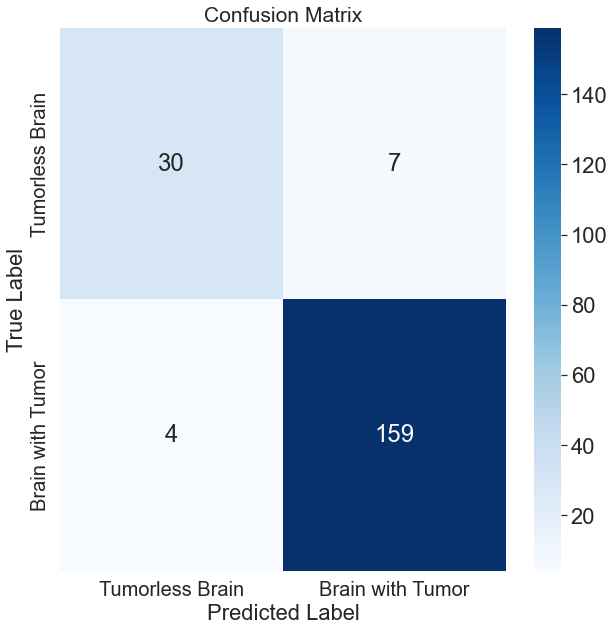

In [22]:
# Evaluating the CNN model by creating a confusion matrix
cm = confusion_matrix(y_test, y_prediction2)

plt.figure(figsize=(10,10))
ax = plt.subplot()

sns.set(font_scale=2) 
sns.heatmap(cm, annot=True, ax=ax, cmap="Blues", fmt="g");  

# Labels, title and ticks
label_font = {'size':'22'} 
ax.set_xlabel('Predicted Label', fontdict=label_font);
ax.set_ylabel('True Label', fontdict=label_font);

title_font = {'size':'21'}  
ax.set_title('Confusion Matrix', fontdict=title_font);

ax.tick_params(axis='both', which='major', labelsize=20) 
ax.xaxis.set_ticklabels(['Tumorless Brain', 'Brain with Tumor']);
ax.yaxis.set_ticklabels(['Tumorless Brain', 'Brain with Tumor']);
plt.show()